In [16]:
from scipy.ndimage import rotate
import numpy as np

(<matplotlib.figure.Figure at 0x11295af98>,
 <matplotlib.image.AxesImage at 0x112c3ed30>)

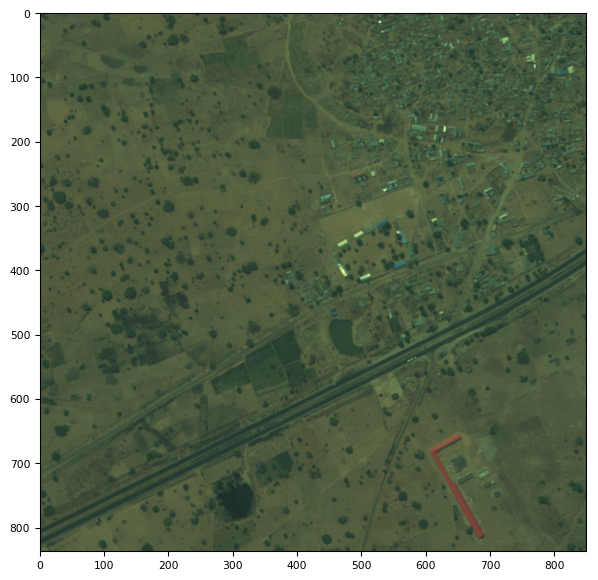

In [19]:
import tifffile as tiff
import os
from matplotlib import pyplot as plt

%matplotlib inline

id = '22'
img = tiff.imread(os.path.expanduser('~/Datasets/32017/sat_images/mband/{}.tif'.format(id)))
msk = tiff.imread(os.path.expanduser('~/Datasets/32017/sat_images/gt_mband/{}.tif'.format(id)))
tiff.imshow(img.copy()[(4,2,1), :, :])  # select RGB channels

In [13]:
img_rot = rotate(img.transpose([1, 2, 0]), 45)

In [14]:
img_rot.shape

(1192, 1192, 8)

(<matplotlib.figure.Figure at 0x112e7c438>,
 <matplotlib.image.AxesImage at 0x112941c50>)

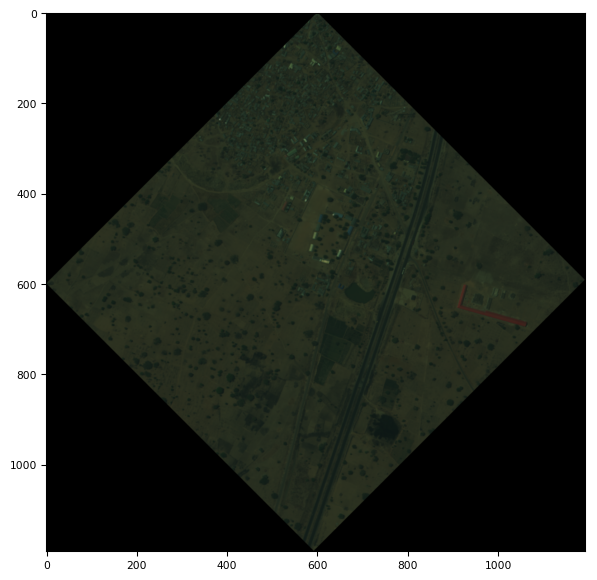

In [15]:
tiff.imshow(img_rot[:, :,(4,2,1)])

In [17]:
def picture_from_mask(mask, threshold=0):
    colors = {
        0: [150, 150, 150],  # Buildings
        1: [223, 194, 125],  # Roads & Tracks
        2: [27, 120, 55],    # Trees
        3: [166, 219, 160],  # Crops
        4: [116, 173, 209]   # Water
    }
    z_order = {
        1: 3,    # crops
        2: 4,    # water
        3: 0,    # buildings
        4: 1,    # roads
        5: 2     # trees
    }
    pict = 255*np.ones(shape=(3, mask.shape[1], mask.shape[2]), dtype=np.uint8)
    for i in range(1, 6):
        cl = z_order[i]
        for ch in range(3):
            pict[ch,:,:][mask[cl,:,:] > threshold] = colors[cl][ch]
    return pict

(<matplotlib.figure.Figure at 0x1384800f0>,
 <matplotlib.image.AxesImage at 0x138a47908>)

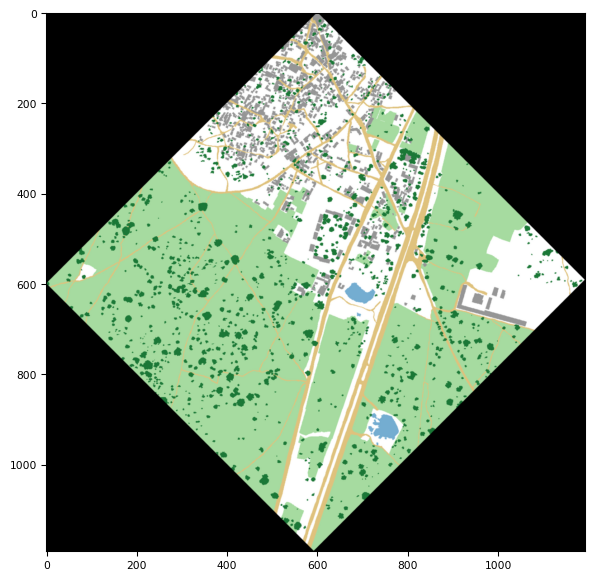

In [24]:
tiff.imshow(rotate(picture_from_mask(msk), 45, axes=(1,2)))

In [25]:
def superimpose_2d_mask_on_img(img, mask, mask_color=(10, 0, 0)):
    # since imgs are 16-bit and masks are 8-bit images, first normalize rgbs
    normalized_img = img * 255.0 / img.max()
    colored_mask = np.stack([mask_color[0]*mask, mask_color[1]*mask, mask_color[2]*mask])
    im = (normalized_img + colored_mask).clip(0, 255).astype(np.uint8)
    return im

In [26]:
rgb_img = img[(4,2,1),:,:]

(<matplotlib.figure.Figure at 0x110ee8fd0>,
 <matplotlib.image.AxesImage at 0x110f61198>)

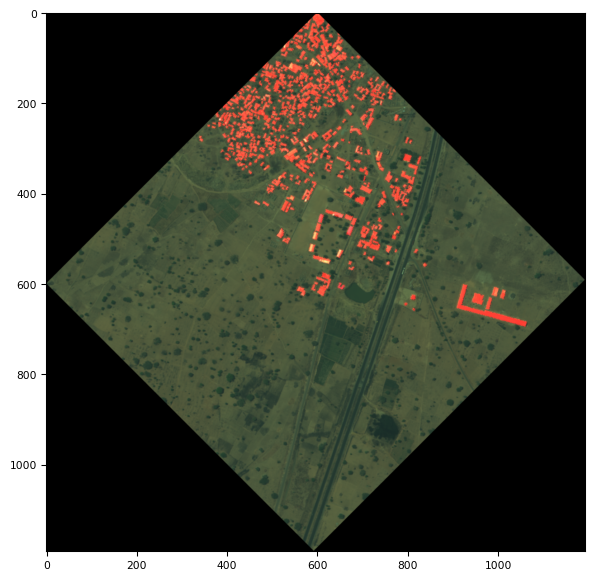

In [30]:
tiff.imshow( superimpose_2d_mask_on_img(rotate(rgb_img, 45, axes=(1,2)), rotate(msk[0,:,:], 45) ))  # buildings